In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def vertices(Ns, Lx, Ly):
    '''
    Vertices rede
    '''
    vx0K = [0.5, 0.5]
    vy0K = [0.5*np.tan(np.deg2rad(30)), np.tan(np.deg2rad(60.))-0.5*np.tan(np.deg2rad(30))]
    
    vx0T = 1.5
    vy0T = 0.5*np.tan(np.deg2rad(60.))

    v_x = []
    v_y = []
    
    marker = []
    n_K = 0
    n_T = 0
    nx = int(np.sqrt(Ns/3))
    ny = int(np.sqrt(Ns/3))
    for j in range(ny):
        for i in range(nx):
            for l in range(2):
                v_x.append(vx0K[l] + 2*i + j%2)
                v_y.append(vy0K[l] + 2*np.sin(np.deg2rad(60.))*j)
                n_K += 1
                
            v_x.append(vx0T + 2*i + j%2)
            v_y.append(vy0T + 2*np.sin(np.deg2rad(60))*j)
            n_T += 1
    
    v_x = np.array(v_x) - 0.5*Lx
    v_y = np.array(v_y) - 0.5*Ly
    
    return v_x, v_y
    

In [3]:
def carga_vertice(x, y, mx, my, vx, vy, Lx, Ly):
    vertice = []
    vertice_Q = []

    for i in range(len(vx)):
        ver = []
        ver_q = []
        for ni in np.arange(-2,3):
            for nj in np.arange(-2,3):
                for j in range(len(x)):
                    dx = vx[i] - x[j] + float(ni*Lx)
                    dy = vy[i] - y[j] + float(nj*Ly)
                    dist = np.sqrt(dx**2 + dy**2)
                    if ((i+1)%3 != 0):
                        if (dist<1.1 and dist>0.1):
                            Lij = dx*mx[j] + dy*my[j]
                            ver.append(j)
                            ver_q.append(Lij)
                    else:
                        if (dist<1.3 and dist>0.9):
                            Lij = dx*mx[j] + dy*my[j]
                            ver.append(j)
                            ver_q.append(Lij)
        if (len(ver) != 0):
            vertice.append(ver)
            vertice_Q.append(ver_q)

    return vertice, vertice_Q
        

In [4]:
config0 = pd.read_csv('config0.csv')
config0.head()

,x,y,mx,my
0,-10.0,-8.660254,-8.660254e-01,-0.5
1,-9.5,-7.794229,-6.123234e-17,-1.0
2,-9.0,-8.660254,8.660254e-01,-0.5
3,-8.0,-8.660254,-8.660254e-01,-0.5
4,-7.5,-7.794229,-6.123234e-17,-1.0


In [11]:
x = config0.x.to_numpy()
y = config0.y.to_numpy()
mx = config0.mx.to_numpy()
my = config0.my.to_numpy()

Ns = len(x)

Lx = x.max() - x.min()
Ly = y.max() - y.min() + np.sin(np.deg2rad(60.))

C = np.arctan2(my, mx) # color
C[C<0] = 2*np.pi + C[C<0]

data = [x, y, mx, my, C]

v_x, v_y = vertices(Ns, Lx, Ly)

In [12]:
def init_field(x, y, mx, my, Lx, Ly, nx, ny):
    xmin, xmax = min(x), max(x)
    ymin, ymax = min(y), max(y)
    Bx = np.zeros((nx, ny))
    By = np.zeros((nx, ny))
    X = np.linspace(5*xmin, 5*xmax, nx)
    Y = np.linspace(5*ymin, 5*ymax, ny)
    XX, YY = np.meshgrid(X, Y)
    
    for jB in range(ny):
        for iB in range(nx):
            #for ny in range(-1, 2):
                #for nx in range(-1, 2):
            for j in range(len(x)):
                dx = XX[iB][jB] - x[j]# + float(nx*Lx)
                dy = YY[iB][jB] - y[j]# + float(ny*Ly)
                dist = np.sqrt(dx**2 + dy**2)
                if dist > 0.15:
                    dx = dx/dist
                    dy = dy/dist
                    a1 = 3*(mx[j]*dx + my[j]*dy)
                    Bx[iB][jB] += (a1*dx - mx[j])/dist**3
                    By[iB][jB] += (a1*dy - my[j])/dist**3

    plt.streamplot(XX, YY, Bx, By, density=3)
    plt.axis('equal')
    

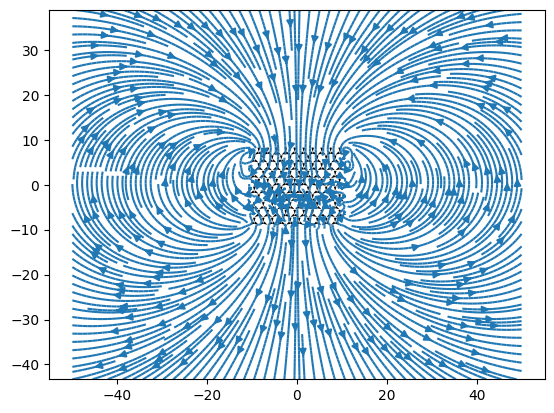

In [13]:
mx[4] *= -1
my[4] *= -1

init_field(x, y, mx, my, Lx, Ly, 100, 100)
plt.quiver(x, y, mx, my, angles='xy', scale_units='xy', scale=1, pivot='middle', cmap='bwr')

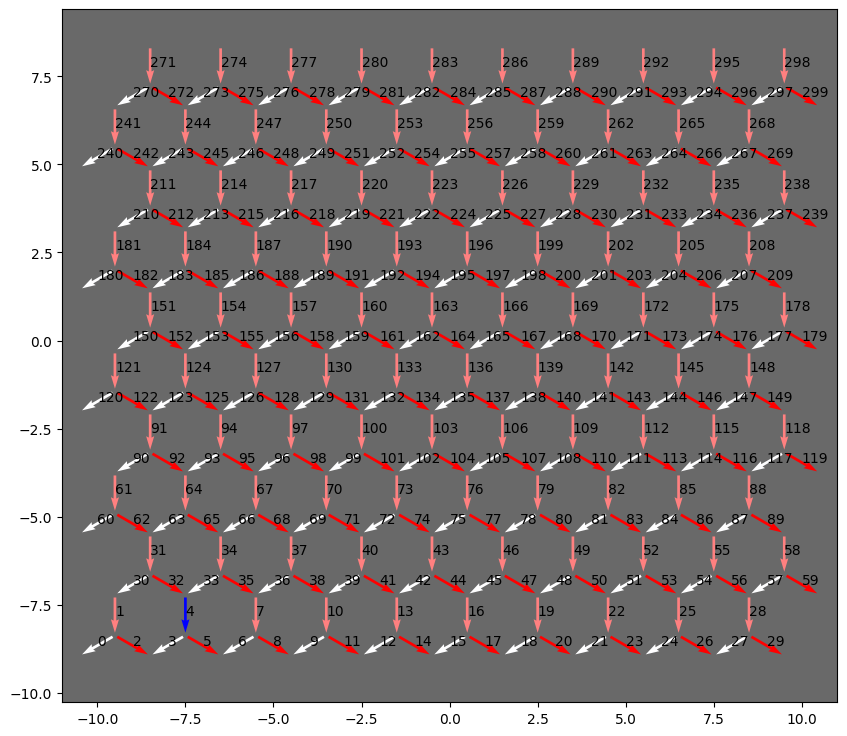

In [14]:
plt.figure(figsize=(10,9), facecolor=None)
ax = plt.axes()
plt.quiver(*data, angles='xy', scale_units='xy', scale=1, pivot='middle', cmap='bwr')
for i in range(len(x)):
    plt.text(x[i], y[i], s=i)
#for i in range(len(marker)):
#    plt.scatter(vertice_x[i], vertice_y[i], s=500, marker=marker[i])
#plt.scatter(v_x_K, v_y_K, s=50)
# plt.scatter(v_x, v_y, c='gainsboro', alpha=0.2)
plt.axis('equal')
ax.set_facecolor('dimgray')

In [15]:
vertice, vertice_Q = carga_vertice(x, y, mx, my, v_x, v_y, Lx, Ly)

In [16]:
carga = []

for i in range(len(vertice)):
    carga.append(sum(vertice_Q[i]))


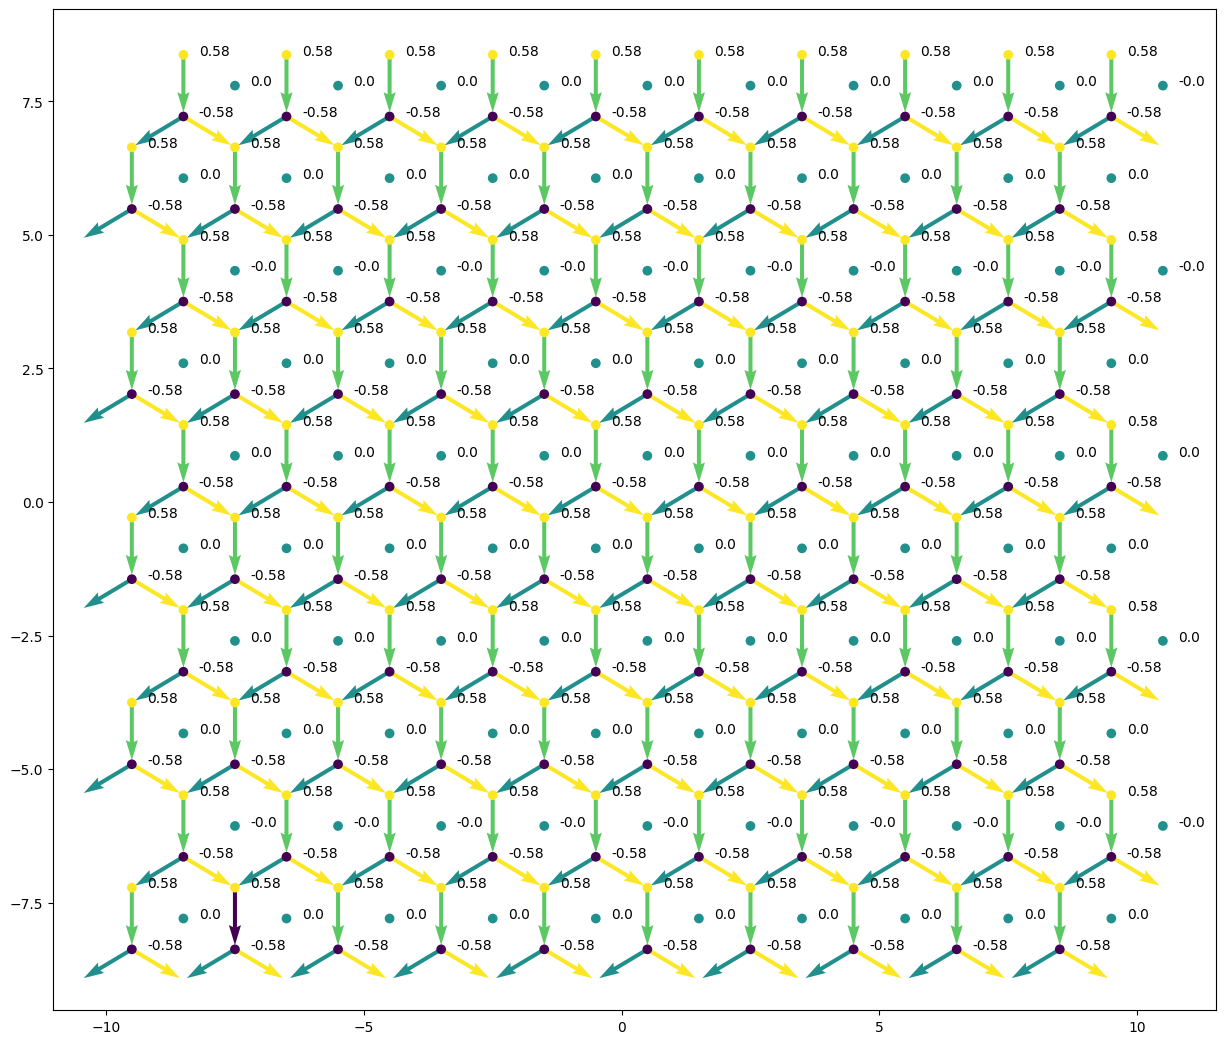

In [17]:
plt.figure(figsize=(15,13))
plt.quiver(*data, angles='xy', scale_units='xy', scale=1, pivot='mid',color='g')
plt.scatter(v_x, v_y, c=carga)

for i in range(len(carga)):
    plt.text(v_x[i]+0.3, v_y[i], s=str(np.around(carga[i],2)))

In [18]:
np.around(carga[0],2)

-0.58

In [19]:
q_K = 0
q_T = 0
for i in range(len(carga)):
    if ((i+1)%3 != 0):
        q_K += carga[i]
    else:
        q_T += carga[i]

In [20]:
q_K

1.2878587085651816e-13

In [21]:
q_T

1.8207657603852567e-13

In [22]:
from scipy.spatial import cKDTree

In [23]:
len(vertice_Q)

300

In [24]:
len(vertice)

300

In [25]:
kagome_charge = []
for i in range(len(vertice)):
    if (i + 1) % 3 != 0:
        for j, k in zip(vertice[i], range(3)):
            #print(i, j, k)
            kagome_charge.append(vertice_Q[i][k])
sum(kagome_charge)

1.2878587085651816e-13

In [26]:
len(vertice[2])

6

(-1.1004513512706338, 1.0, -1.1015507921297296, 1.0)

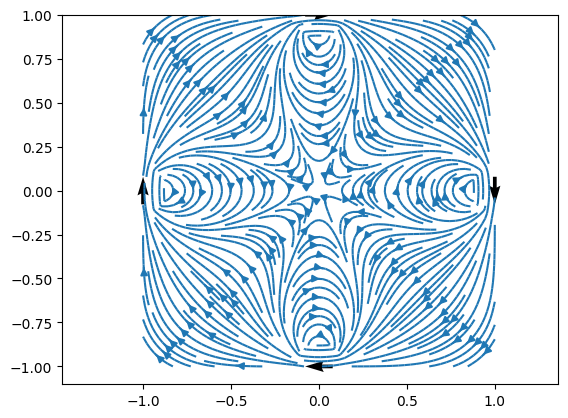

In [27]:
nx = 100
ny = 100

Bx = np.zeros((nx, ny))
By = np.zeros((nx, ny))
X = np.linspace(-1, 1, nx)
Y = np.linspace(-1, 1, ny)
XX, YY = np.meshgrid(X, Y)

x = [-1., 0., 1., 0.]
y = [0., 1., 0., -1.]
mx = [0., 1., 0., -1.]
my = [1., 0., -1., 0.]

for jB in range(ny):
    for iB in range(nx):
        #for ny in range(-1, 2):
            #for nx in range(-1, 2):
        for j in range(len(x)):
            dx = XX[iB][jB] - x[j]# + float(nx*Lx)
            dy = YY[iB][jB] - y[j]# + float(ny*Ly)
            dist = np.sqrt(dx**2 + dy**2)
            if dist > 0.15:
                dx = dx/dist
                dy = dy/dist
                a1 = 3*(mx[j]*dx + my[j]*dy)
                Bx[iB][jB] += (a1*dx - mx[j])/dist**3
                By[iB][jB] += (a1*dy - my[j])/dist**3
                
plt.streamplot(XX, YY, Bx, By, density=2)
plt.quiver(x, y, mx, my, pivot='middle')
plt.axis('equal')
    

In [38]:

for i in range(12):
    Q = 0
    k = 0
    for j in vertice[i]:
        print('\n \n Vértice = ',i,'\n Spin = ', j, '\n indice vertice', k)
        print(vertice_Q[i][k])
        k += 1


 
 Vértice =  0 
 Spin =  0 
 indice vertice 0
-0.5773502691896258

 
 Vértice =  0 
 Spin =  1 
 indice vertice 1
0.5773502691896253

 
 Vértice =  0 
 Spin =  2 
 indice vertice 2
-0.5773502691896258

 
 Vértice =  1 
 Spin =  1 
 indice vertice 0
-0.5773502691896253

 
 Vértice =  1 
 Spin =  30 
 indice vertice 1
0.5773502691896258

 
 Vértice =  1 
 Spin =  59 
 indice vertice 2
0.5773502691896258

 
 Vértice =  2 
 Spin =  1 
 indice vertice 0
-6.123233995736767e-17

 
 Vértice =  2 
 Spin =  2 
 indice vertice 1
2.7755575615628914e-16

 
 Vértice =  2 
 Spin =  3 
 indice vertice 2
2.7755575615628914e-16

 
 Vértice =  2 
 Spin =  4 
 indice vertice 3
6.123233995736767e-17

 
 Vértice =  2 
 Spin =  30 
 indice vertice 4
-2.7755575615628914e-16

 
 Vértice =  2 
 Spin =  32 
 indice vertice 5
-2.7755575615628914e-16

 
 Vértice =  3 
 Spin =  3 
 indice vertice 0
-0.5773502691896258

 
 Vértice =  3 
 Spin =  4 
 indice vertice 1
0.5773502691896253

 
 Vértice =  3 
 Spin =  5 